## Name: Luke Nelson
## Student ID: 5281493709

# <center> Homework 2 </center>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
import sklearn.model_selection as model_selection
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
from statsmodels.stats.outliers_influence import OLSInfluence
import statsmodels.api as sm

/Users/lukenelson/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Question 1
###     (a) Download the Combined Cycle Power Plant data from the url

In [2]:
fileDir = os.path.dirname(os.path.realpath('__file__'))   
filename = os.path.join(fileDir, '../data/CCPP/Folds5x2_pp.xlsx')
filename = os.path.abspath(os.path.realpath(filename))
df=pd.read_excel(filename, index_col=None)   #Read in the .xlsx file
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the Data
### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [7]:
df.shape
#df.info()
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


#### This dataset has 9568 rows (note: I am not considering the header to be a row) and 5 columns. The columns represent the variables/attributes, whereas the rows represent the observations taken at the combined cycle powerplant over the 6 years from 2006-2011; each row is an observation. Columns AT, V, AP, and RH are the feature variables, while PE is the output variable.

### ii. Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

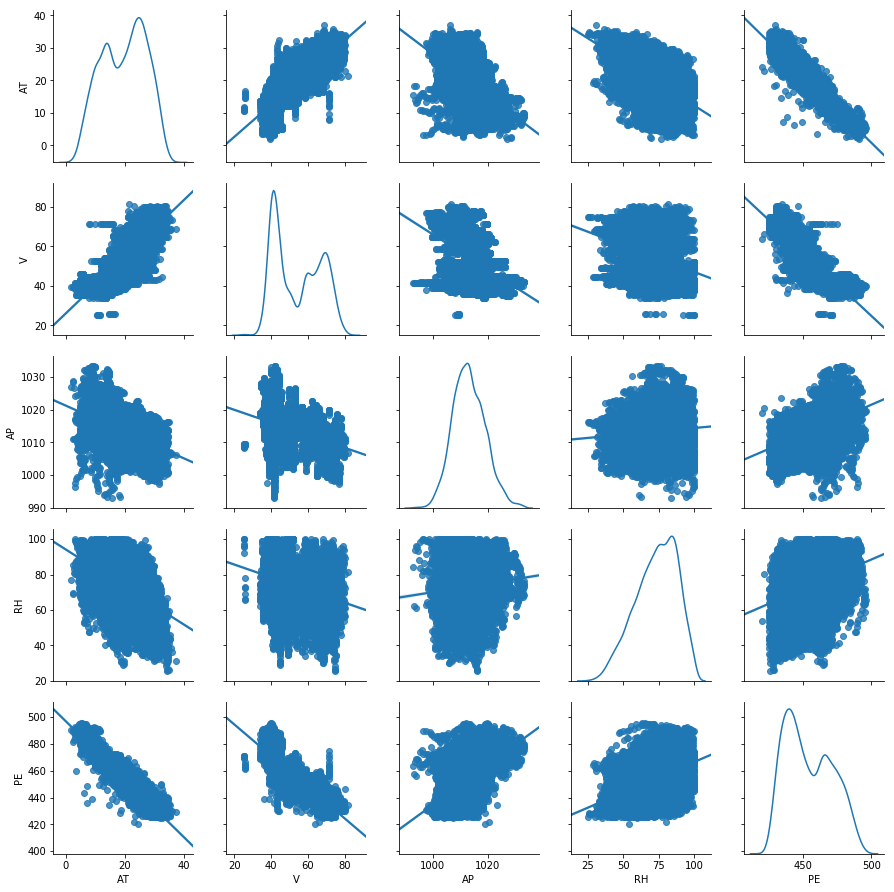

In [4]:
g1 = sns.pairplot(df,
                  kind='reg',
                diag_kind='kde',
                 palette='dark')

#### It looks as if there may be some linear relationships among a number of the variable pairs. It looks like there might be a strong inverse linear relationship between PE and V, and PE and AT. There also appears to be inverse relationships among AT and RH. There looks to be a positive relationship among AT and V. It appears in the scatter plots that there may be some outliers in the data. Plots I would specifically like to check for outliers include PE x AT, PE x V, V x AP, V x AT, V x RH. While there are positive and negative relationships among a number of the variable, some of these relationships may be better modeled with interaction and non-linear models.

### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table

In [5]:
table=df.describe()
table=table.drop(['count','std'], axis=0)
table.loc['range']=table.loc['max']-table.loc['min']
table.loc['interquartile range']=table.loc['75%']-table.loc['25%']
#table.loc['median']=df.median()    We don't need this becasue 50% is the median
table=table.rename(index={'25%':'first quartile','50%':'median','75%':'third quartile'})    #Change the name of the index
table=table.drop(['min','max'], axis=0)
table

,AT,V,AP,RH,PE
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
first quartile,13.510000,41.740000,1009.100000,63.327500,439.750000
median,20.345000,52.080000,1012.940000,74.975000,451.550000
third quartile,25.720000,66.540000,1017.260000,84.830000,468.430000
range,35.300000,56.200000,40.410000,74.600000,75.500000
interquartile range,12.210000,24.800000,8.160000,21.502500,28.680000


### (C) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [6]:
#Functions for running this 4 times

def regress(dataframe, variable):
    #scatterplot
    #sns.pairplot(dataframe, x_vars=[variable], y_vars='PE', size=4, aspect=1.3, kind='reg')
    
    
    # Use statsmodels to fit the model
    reg = smf.ols(formula='PE ~ '+variable, data=dataframe).fit()
    
    #p-values
    print('p-values are as follows:')
    print(reg.pvalues)
    
    #print the summary
    return reg.summary()

#Boxplot Function
def boxplot(dataframe, variable):
    #Boxplot
    return sns.boxplot(x=dataframe[variable])

#Function to plot based on our predicted equation
def reg_plot(dataframe,variable):
    reg = smf.ols(formula='PE ~ '+variable, data=dataframe).fit()
    params=reg.params
    xmax=max(df.loc[:,variable].values)
    xmin=min(df.loc[:,variable].values)
    xlist=np.arange(xmin-1,xmax+1,1)
    reg_line=list()
    for i in xlist:
        reg_func=params[0]+(params[1]*i)
        reg_line.append(reg_func)

    fig, ax = plt.subplots()
    ax.plot(df.loc[:,variable].values, df.loc[:,'PE'].values, 'o', label='Data Points')
    ax.plot(xlist, reg_line, 'r-', label='Regression Line',linewidth=2.0)
    leg = ax.legend()
    ax.set_xlabel(variable)
    ax.set_title('PE vs. '+variable+' Scatter Plot with Regression Line')
    ax.set_ylabel('PE')
    ax.grid(True)
    
def outliers(dataframe, variable):
    reg = smf.ols(formula='PE ~ '+variable, data=dataframe).fit()
    infl = reg.get_influence()
    stdnt=infl.resid_studentized_internal
    stdnt=np.array(stdnt)
    abs_stdnt=np.abs(stdnt)

    v=df.loc[:,variable].values
    v=v.ravel()
    v=list(v)

    f=df.loc[:,'PE'].values
    f=f.ravel()
    f=list(f)

    find_index2=np.where(abs_stdnt>3)

    find_index2=find_index2[0].ravel()
    find_index2=list(find_index2)
    print('The following ('+variable+', PE) values are outliers based on the studentized residuals method described in Section 3.3.3 of the ISLR Book:')
    for q in find_index2:
        v_star=v[q]
        f_star=f[q]
        ans=(v_star,f_star)
        print(ans)
     
    
    #Studentized 
    #reg = smf.ols(formula='PE ~ '+variable, data=dataframe).fit()
    #infl = reg.get_influence()
    #stdnt=infl.resid_studentized_internal
    #stdnt=np.array(stdnt)

    #predicted
    params=reg.params
    xvals=list()
    x=df.loc[:,variable].values
    x=x.ravel()
    x=list(x)
    for i in x:
        reg_func=params[0]+(params[1]*i)
        xvals.append(reg_func)

    three = [3] * 9568
    three_neg = [-3]*9568

    fig, ax = plt.subplots()
    ax.plot(xvals, stdnt, 'o',)
    ax.plot(xvals,three,'k-')
    ax.plot(xvals,three_neg,'k-')
    ax.set_xlabel('Fitted Values')
    ax.set_title('PE vs. '+variable+' Plot of Studentized Residuals')
    ax.set_ylabel('Residuals')
    ax.grid(True)  

### AT:

In [7]:
#AT
regress(df,'AT')


p-values are as follows:
Intercept    0.0
AT           0.0
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:25   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

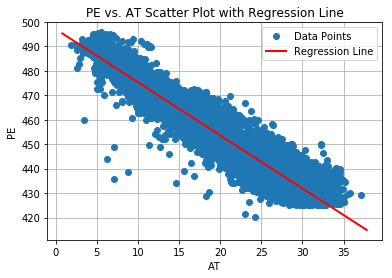

In [8]:
reg_plot(df,'AT')

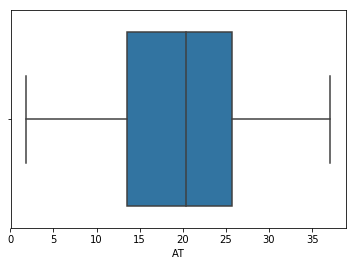

In [9]:
boxplot(df,'AT')

The following (AT, PE) values are outliers based on the studentized residuals method described in Section 3.3.3 of the ISLR Book:
(21.19, 469.76)
(12.97, 452.07)
(26.35, 458.41)
(26.38, 457.81)
(10.4, 492.09)
(10.76, 490.78)
(32.48, 446.48)
(15.61, 439.21)
(11.41, 449.5)
(22.66, 431.27)
(11.56, 489.54)
(12.68, 448.69)
(12.05, 454.18)
(32.96, 443.57)
(16.51, 442.48)
(8.74, 438.63)
(6.22, 443.73)
(11.09, 490.96)
(12.51, 452.84)
(14.69, 434.12)
(23.0, 421.57)
(32.31, 450.13)
(21.4, 434.09)
(34.61, 438.56)
(23.74, 463.4)
(34.51, 439.8)
(9.41, 492.88)
(11.42, 490.02)
(22.97, 466.7)
(11.26, 489.66)
(16.84, 437.14)
(18.6, 430.38)
(7.06, 448.97)
(23.54, 426.24)
(13.78, 445.98)
(7.14, 435.58)
(30.28, 447.67)
(18.26, 428.67)
(32.31, 449.65)
(3.4, 459.86)
(24.27, 420.26)
(34.03, 440.29)


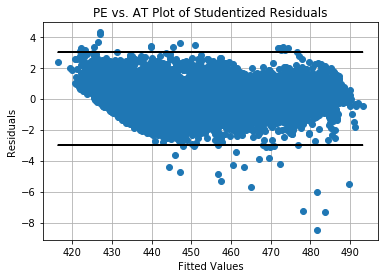

In [10]:
outliers(df,'AT')

#### Answer: Because the p-value for AT is below 0.05, we can reject the null in favor of the alternative. The alternative suggests there is a statistically significant association between the predictor AT and the response PE. Under the box plot method for locating outliers, there do not appear to be any outliers (see plot above). However, based on the studentized residuals method described in section 3.3.3 of the ISLR book, it appears that there are outliers. The outliers have been printed above and a plot of the residuals vs the predicted values is also provided. We can see that there are a number of observations with studentized residuals greater than abs(3) and are thus considered outliers.

### V:

In [11]:
#V
regress(df,'V')

p-values are as follows:
Intercept    0.0
V            0.0
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:27   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

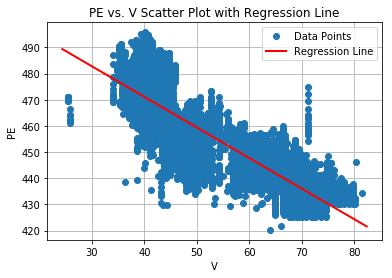

In [12]:
reg_plot(df,'V')

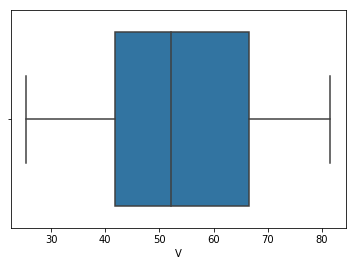

In [13]:
boxplot(df,'V')

The following (V, PE) values are outliers based on the studentized residuals method described in Section 3.3.3 of the ISLR Book:
(71.14, 466.56)
(42.67, 440.69)
(38.52, 439.21)
(71.14, 471.99)
(71.14, 461.18)
(43.21, 430.45)
(25.88, 461.86)
(47.93, 435.61)
(43.77, 440.64)
(43.21, 434.83)
(25.88, 460.97)
(71.14, 474.66)
(36.3, 438.63)
(39.85, 443.73)
(49.64, 434.12)
(43.21, 436.53)
(43.77, 440.31)
(44.37, 429.81)
(43.77, 440.95)
(71.14, 460.02)
(71.14, 463.22)
(43.21, 433.31)
(43.21, 434.11)
(53.3, 430.27)
(43.21, 434.09)
(43.5, 429.96)
(71.14, 469.64)
(41.22, 435.58)
(43.21, 438.68)
(71.14, 464.18)
(44.05, 440.2)
(71.14, 462.51)
(47.93, 435.27)


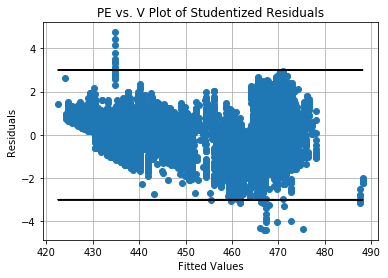

In [14]:
outliers(df,'V')

#### Answer: Because the p-value for V is below 0.05, we can reject the null in favor of the alternative. The alternative suggests there is a statistically significant association between the predictor V and the response PE. Under the box plot method for locating outliers, there do not appear to be any outliers (see plot above). However, based on the studentized residuals method described in section 3.3.3 of the ISLR book, it appears that there are outliers. The outliers have been printed above and a plot of the residuals vs the predicted values is also provided. We can see that there are a number of observations with studentized residuals greater than abs(3) and are thus considered outliers.

### AP:

In [15]:
#AP
regress(df,'AP')

p-values are as follows:
Intercept    0.0
AP           0.0
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:29   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

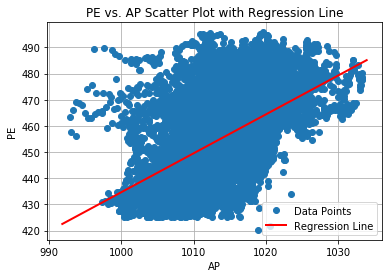

In [16]:
reg_plot(df,'AP')

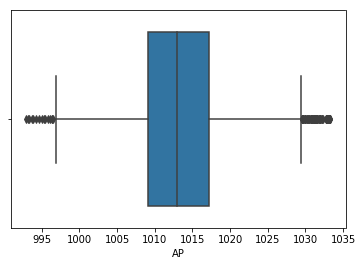

In [17]:
boxplot(df,'AP')

The following (AP, PE) values are outliers based on the studentized residuals method described in Section 3.3.3 of the ISLR Book:
(1003.24, 485.83)
(995.24, 473.96)
(996.32, 489.38)
(999.77, 486.6)
(1002.04, 485.57)
(1005.35, 486.79)
(998.79, 489.11)
(1003.58, 486.09)
(1001.43, 483.92)
(1005.54, 488.36)
(996.03, 475.46)
(1001.95, 484.47)
(1004.28, 486.41)
(1002.48, 485.08)
(1010.85, 494.9)
(1001.66, 484.51)
(999.37, 477.82)
(1007.62, 489.8)
(1003.51, 486.46)
(1004.87, 485.67)
(1003.82, 485.24)
(993.74, 469.05)
(1001.58, 484.87)
(1002.09, 483.63)
(997.67, 489.86)
(999.22, 487.35)
(1001.37, 485.6)
(1004.24, 485.23)
(1000.59, 485.2)


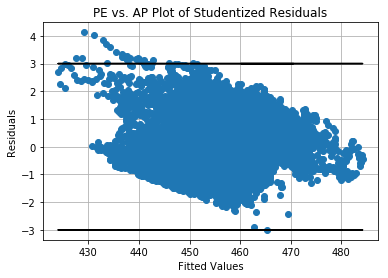

In [18]:
outliers(df,'AP')

#### Answer: Because the p-value for AP is below 0.05, we can reject the null in favor of the alternative. The alternative suggests there is a statistically significant association between the predictor AP and the response PE. Under the box plot method for locating outliers, there do appear to be a number of outliers (see plot above). Based on the studentized residuals method described in section 3.3.3 of the ISLR book, it appears that there are outliers as well. The outliers have been printed above and a plot of the residuals vs the predicted values is also provided. We can see that there are a number of observations with studentized residuals greater than abs(3) and are thus considered outliers.

### RH:

In [19]:
#RH
regress(df,'RH')

p-values are as follows:
Intercept    0.0
RH           0.0
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:30   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

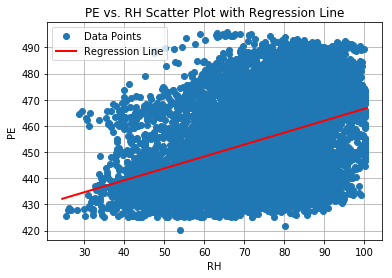

In [20]:
reg_plot(df,'RH')

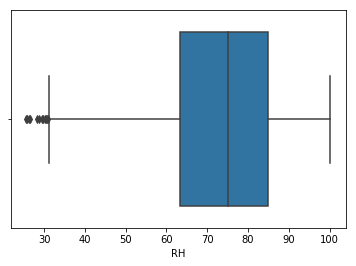

In [21]:
boxplot(df,'RH')

The following (RH, PE) values are outliers based on the studentized residuals method described in Section 3.3.3 of the ISLR Book:
(58.99, 495.21)
(55.44, 493.72)


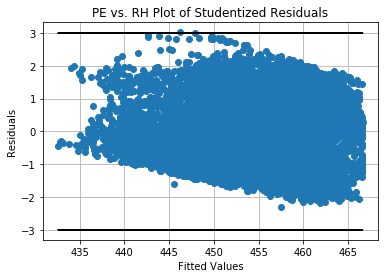

In [22]:
outliers(df,'RH')

#### Answer: Because the p-value for RH is below 0.05, we can reject the null in favor of the alternative. The alternative suggests there is a statistically significant association between the predictor RH and the response PE. Under the box plot method for locating outliers, there do appear to be a number of outliers (see plot above). Based on the studentized residuals method described in section 3.3.3 of the ISLR book, it appears that there are 2 outliers. The outliers have been printed above and a plot of the residuals vs the predicted values is also provided. We can see that there are a number of observations with studentized residuals greater than abs(3) and are thus considered outliers.

### Another method to check for outliers:

In [23]:
#Checking for outliers via the z-score method
z = np.abs(stats.zscore(df))
print(np.where(z > 3))

(array([ 319,  536,  669,  715,  753,  789,  810,  847, 1091, 1250, 1660,
       2262, 2298, 2481, 2579, 2761, 3015, 3021, 3213, 3412, 3483, 3603,
       3796, 3955, 4067, 4125, 4327, 4367, 5431, 5529, 5690, 5805, 5840,
       5863, 5928, 5956, 6006, 6346, 6789, 7077, 7186, 7320, 7485, 7807,
       7892, 8061, 8098, 8104, 8133, 8270, 8462, 8568, 8751, 9015, 9068,
       9159, 9267, 9342]), array([2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2]))


#### Overall Answer: <br>
#### Assuming an alpha of 0.05, there is a statistically significant association between the predictor and the response for each of the 4 models.<br>
#### Based on the studentized residuals method described in section 3.3.3 of the ISLR book, it appears that there are outliers in all four of the models. The outliers have been printed above for each model and a plot of the residuals is also provided.<br>
#### If we want to identify outliers with boxplots, there are outliers in the PE vs AP and PE vs RH models. The boxplots cleary show there are a number of outliers for each of these two models. While calculating z-scores for all data points in the dataframe, I've located all data points with a z score greater than 3 or less than -3, and have defined these as outliers. This method agrees with the boxplot method, because the z-score method flagged a number of outliers in the AP and RH columns.<br>

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0: Bj=0?

In [24]:
mreg = smf.ols(formula='PE ~ AT + V + AP + RH', data=df).fit()


print(mreg.summary())


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:31   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

#### Answer:<br>
#### All 4 predictors have small p-values (p-values less than 0.05), so we reject the null for AT, V, AP, and RH. Since we reject the null, we favor the alternative and thus can say that there is a statistically significant association between the predictors and the response.  <br>
#### AP is positively associated with PE, whereas the remaining predictors are negatively associated with PE. <br>
#### This model has a high R-sqaured which suggests that a large proportion of the variance of PE can be explained by the predictor variables.

### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis and the multiple regresison coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x axis and its coefficient estimate in the multiple linear regression model is shown on the y axis. 

In [25]:
def params(dataframe, variable):
    # Use statsmodels to fit the model
    reg = smf.ols(formula='PE ~ '+variable, data=dataframe).fit()
    
    #pparams
    x=reg.params
    return x[1]

In [26]:
lab=['AT','V','AP','RH']
c_x=[params(df,'AT'),params(df,'V'),params(df,'AP'),params(df,'RH')]
d_y=[mreg.params[1],mreg.params[2],mreg.params[3],mreg.params[4]]
comp={'Feature':lab,'Univariate Coefficient':c_x,'Multiple Regression Coeff.':d_y}
comp=pd.DataFrame(comp)
comp

,Feature,Multiple Regression Coeff.,Univariate Coefficient
0,AT,-1.977513,-2.171320
1,V,-0.233916,-1.168135
2,AP,0.062083,1.489872
3,RH,-0.158054,0.455650


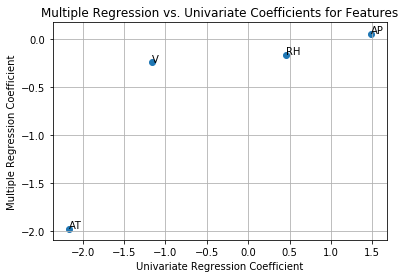

In [27]:
#Plot
fig, ax = plt.subplots()
ax.scatter(c_x, d_y)
ax.set_xlabel('Univariate Regression Coefficient')
ax.set_title('Multiple Regression vs. Univariate Coefficients for Features')
ax.set_ylabel('Multiple Regression Coefficient')
ax.grid(True)

for i, txt in enumerate(lab):
    ax.annotate(txt, (c_x[i], d_y[i]))

#### Answer: <br>Please see the plot above. All four predictors appear to have a statistically significant association to PE when placed in its own simple linear regression model. When all predictors are placed together in a multiple linear regression model, they all still appear to have a statiscally significant association to PE. The coefficient for AT remained similar in both models at around -2. The magnitudes of V, AP, and RH wer larger in the univariate model. The coefficient for RH was positively associated with PE in the univariate model, but negative associated in the multiple regression model. AP was positively associated with PE in both models. AT and V were negatively associated with PE in both models.

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form Y=B0+B1X+B2X^2+B3X^3+epsilon

In [28]:
#Function for this

def nonlin_regress(dataframe, variable):
    #Create new matrix of the predictor to include the polynomials
    X=dataframe.loc[:,variable].values.reshape(-1,1)
    poly = PolynomialFeatures(3)
    X=poly.fit_transform(X)
    
    #Re-create dataframe from the array X
    new_df=pd.DataFrame({'X':X[:,1], 'X2':X[:,2],'X3':X[:,3]})
    new_df.loc[:,'PE']=dataframe.loc[:,'PE']
    
    nlreg = smf.ols(formula='PE ~ X + X2 + X3', data=new_df).fit()

    return nlreg.summary()
    

### AT:

In [29]:
#AT
nonlin_regress(df, 'AT')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:32   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.000     491.409     494.047
X             -0.6103      0.124     -4.941      0.000      -0.852      -0.368
X2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
X3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### There is evidence of a nonlinear association between AT and PE. The p value is less than 0.05 for X, X^2, and X^3.

### V:

In [30]:
#V
nonlin_regress(df, 'V')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:32   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.000     536.209     572.084
X             -2.1444      0.509     -4.214      0.000      -3.142      -1.147
X2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
X3             0.0001   5.45e-05      2.465      0.014    2.75e-05       0.000
==============================================================================
Omnibus:                      160.101   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.778
Skew:                          -0.125   Prob(JB):                     1.77e-61
Kurtosis:                       3.800   Cond. No.                     2.47e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### There is evidence of a nonlinear association between V and PE. The p value is less than 0.05 for the coefficients of X and X^3, however it is greater than 0.05 for the coefficient for X^2. Thus, X and X^3 show a statistically significant association with PE, but X^2 does not.

### AP:

In [31]:
#AP
nonlin_regress(df, 'AP')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:32   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.000       0.057       0.092
X             25.2556      3.001      8.415      0.000      19.372      31.139
X2            -0.0500      0.006     -8.439      0.000      -0.062      -0.038
X3          2.514e-05   2.92e-06      8.613      0.000    1.94e-05    3.09e-05
==============================================================================
Omnibus:                      556.766   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              640.319
Skew:                           0.621   Prob(JB):                    9.05e-140
Kurtosis:                       2.751   Cond. No.                     2.12e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+15. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### There is evidence of a nonlinear association between AP and PE. The p value is less than 0.05 for X, X^2, and X^3.

### RH:

In [32]:
#RH
nonlin_regress(df, 'RH')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:32   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.000     447.744     489.083
X             -1.7292      0.486     -3.557      0.000      -2.682      -0.776
X2             0.0321      0.007      4.433      0.000       0.018       0.046
X3            -0.0002   3.51e-05     -4.340      0.000      -0.000   -8.34e-05
==============================================================================
Omnibus:                      707.867   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.057
Skew:                           0.223   Prob(JB):                     2.56e-66
Kurtosis:                       2.253   Cond. No.                     3.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### There is evidence of a nonlinear association between RH and PE. The p value is less than 0.05 for X, X^2, and X^3.

#### Overall Answer: <br>
#### Yes, there is evidence of nonlinear association between all of the predictors and the response. All coefficients are significant when alpha=0.05 for all predictors, except for the predictor V. For V, we failed to reject the null for the coefficient for X^2, because its p-value was larger than 0.05 (0.768) 

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [33]:
#One model with all possible pairwise combinations
interaction_reg = smf.ols(formula='PE ~ AT + V + AP + RH + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH', data=df).fit()
summary = interaction_reg.summary()
summary.tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,685.7825,78.640,8.721,0.000,531.631,839.934
AT,-4.3470,2.373,-1.832,0.067,-8.999,0.305
V,-7.6749,1.351,-5.682,0.000,-10.323,-5.027
AP,-0.1524,0.077,-1.983,0.047,-0.303,-0.002
RH,1.5709,0.773,2.031,0.042,0.055,3.087
AT:V,0.0210,0.001,23.338,0.000,0.019,0.023
AT:AP,0.0018,0.002,0.752,0.452,-0.003,0.006
AT:RH,-0.0052,0.001,-6.444,0.000,-0.007,-0.004
V:AP,0.0068,0.001,5.135,0.000,0.004,0.009
V:RH,0.0008,0.000,1.716,0.086,-0.000,0.002


#### Answer:<br>
#### The following interaction terms are statistically significant at alpha=0.05, because their p-values are less than 0.05:<br>
AT x V<br>
AT x RH <br>
V x AP<br>
AP x RH

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a  regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs. 

In [34]:
#Create new matrix of the predictors to include the polynomials
preds=['AT','V','AP','RH']
df_g=pd.DataFrame({'A' : []})

for i in preds:
    X=df.loc[:,i].values.reshape(-1,1)
    poly = PolynomialFeatures(2)
    X=poly.fit_transform(X)
    
    #Re-create dataframe from the array X
    df_g.loc[:,i]=X[:,1]
    df_g.loc[:,i+'2']=X[:,2]


df_g.loc[:,'ATxV']=df.loc[:,'AT']*df.loc[:,'V']
df_g.loc[:,'ATxAP']=df.loc[:,'AT']*df.loc[:,'AP']
df_g.loc[:,'ATxRH']=df.loc[:,'AT']*df.loc[:,'RH']
df_g.loc[:,'VxAP']=df.loc[:,'V']*df.loc[:,'AP']
df_g.loc[:,'VxRH']=df.loc[:,'V']*df.loc[:,'RH']
df_g.loc[:,'APxRH']=df.loc[:,'AP']*df.loc[:,'RH']
df_g.loc[:,'PE']=df.loc[:,'PE']
df_g=df_g.drop(['A'], axis=1)
df_g.head()

,AT,AT2,V,V2,AP,AP2,RH,RH2,ATxV,ATxAP,ATxRH,VxAP,VxRH,APxRH,PE
0,14.96,223.8016,41.76,1743.8976,1024.07,1.048719e+06,73.17,5353.8489,624.7296,15320.0872,1094.6232,42765.1632,3055.5792,74931.2019,463.26
1,25.18,634.0324,62.96,3963.9616,1020.04,1.040482e+06,59.08,3490.4464,1585.3328,25684.6072,1487.6344,64221.7184,3719.6768,60263.9632,444.37
2,5.11,26.1121,39.40,1552.3600,1012.16,1.024468e+06,92.14,8489.7796,201.3340,5172.1376,470.8354,39879.1040,3630.3160,93260.4224,488.56
3,20.86,435.1396,57.32,3285.5824,1010.24,1.020585e+06,76.64,5873.6896,1195.6952,21073.6064,1598.7104,57906.9568,4393.0048,77424.7936,446.48
4,10.82,117.0724,37.50,1406.2500,1009.23,1.018545e+06,96.62,9335.4244,405.7500,10919.8686,1045.4284,37846.1250,3623.2500,97511.8026,473.90


In [35]:
#Create training and test set
#Training size is 70%
train, test, train_label, test_label=model_selection.train_test_split(df_g.iloc[:,0:14],df_g.iloc[:,14:], train_size=0.70,shuffle=True, random_state=7)

train_constant=sm.add_constant(train)
test_constant=sm.add_constant(test)


/Users/lukenelson/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
#fit the simple model
model_1 = smf.OLS(train_label,train_constant.loc[:,['const','AT','V','AP','RH']]).fit()
print('Simple Model Summary:',model_1.summary())
print()

#fit the complex model
model_2 = smf.OLS(train_label,train_constant).fit()
print('Complex Model Summary:',model_2.summary())

Simple Model Summary:                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.177e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:32   Log-Likelihood:                -19643.
No. Observations:                6697   AIC:                         3.930e+04
Df Residuals:                    6692   BIC:                         3.933e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        466.7175     11.5

#### As you can see in the Complex Model Summary above, the following variables are insignificant, and will thus be removed:<br>
V2<br>
ATxAP<br>
VxAP<br>
VxRH


In [37]:
#re-fit the complex model
model_2_updated = smf.OLS(train_label,train_constant.loc[:,['const','AT','AT2','V','AP','AP2','RH','RH2','ATxV','ATxRH','APxRH']]).fit()
print('Updated Complex Model Summary:',model_2_updated.summary())



Updated Complex Model Summary:                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.002e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:23:33   Log-Likelihood:                -19201.
No. Observations:                6697   AIC:                         3.842e+04
Df Residuals:                    6686   BIC:                         3.850e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.043e+04

In [38]:
#Test both models on the training set
TRmodel_1_test=model_1.predict(train_constant.loc[:,['const','AT','V','AP','RH']])

TRmodel_2_updated_test=model_2_updated.predict(train_constant.loc[:,['const','AT','AT2','V','AP','AP2','RH','RH2','ATxV','ATxRH','APxRH']])


#Test both models on the test set

model_1_test=model_1.predict(test_constant.loc[:,['const','AT','V','AP','RH']])

model_2_updated_test=model_2_updated.predict(test_constant.loc[:,['const','AT','AT2','V','AP','AP2','RH','RH2','ATxV','ATxRH','APxRH']])






In [39]:
#Calculate Training MSEs
TRMSE_model_1=metrics.mean_squared_error(train_label, TRmodel_1_test)
print('Simple Model Training MSE:',TRMSE_model_1)


TRMSE_model_2=metrics.mean_squared_error(train_label, TRmodel_2_updated_test)
print('Complex Model Training MSE:',TRMSE_model_2)
print()


#Calculate Test MSEs
MSE_model_1=metrics.mean_squared_error(test_label, model_1_test)
print('Simple Model Test MSE:',MSE_model_1)


MSE_model_2=metrics.mean_squared_error(test_label, model_2_updated_test)
print('Complex Model Test MSE:',MSE_model_2)




Simple Model Training MSE: 20.663292894416
Complex Model Training MSE: 18.109948632723913

Simple Model Test MSE: 21.03740943783381
Complex Model Test MSE: 18.244339491175698


#### Answer:<br>
#### I was able to improve my model by using possible interaction terms and nonlinear (quadratic) associations between predictors. As you can see above, training and test MSEs were lower for the complex model than they were for the simple model.

### (i) KNN Regression:<br>
### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k in {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [40]:
#Create new train and test sets that contain only our original features
train2=train.loc[:,['AT','V','AP','RH']]
test2=test.loc[:,['AT','V','AP','RH']]
train_label2=train_label
test_label2=test_label


In [41]:
#Create list of k values to loop through
k_vals=np.arange(1,101,1)

# Normalize the train and test features
norm = MinMaxScaler().fit(train2)

#Training data
train_norm = norm.transform(train2)

# Test Data
test_norm = norm.transform(test2)



The minimum raw test MSE is: 16.019986740972936
This test MSE is produced by the following k values:
[6]
The minimum raw training MSE is: 0.0
This training MSE is produced by the following k values:
[1]


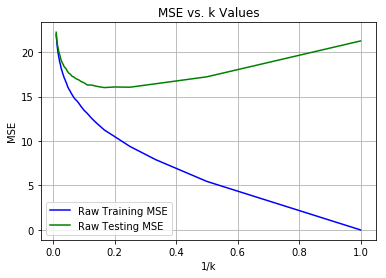

In [42]:
#Use the scikit learn regressor

#For raw features
raw_train_errors=list()
raw_test_errors=list()

for i in k_vals:
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(train2, train_label2)
    
    train_pred=knr.predict(train2)
    train_err=metrics.mean_squared_error(train_label2, train_pred)
    raw_train_errors.append(train_err)
        
    test_pred=knr.predict(test2)
    test_err=metrics.mean_squared_error(test_label2, test_pred)
    raw_test_errors.append(test_err)

#Locate the k value with the lowest test error rate and train error rate
a=np.array(raw_test_errors)
find_index=np.where(a==a.min())
print('The minimum raw test MSE is:',min(raw_test_errors))
print('This test MSE is produced by the following k values:')
for j in find_index:
    k_star=k_vals[j]
    print(k_star)

b=np.array(raw_train_errors)
find_index2=np.where(b==b.min())
print('The minimum raw training MSE is:',min(raw_train_errors))
print('This training MSE is produced by the following k values:')
for q in find_index2:
    k_star2=k_vals[q]
    print(k_star2)

#Plot
fig, ax = plt.subplots()
ax.plot(1/k_vals, raw_train_errors, 'b-', label='Raw Training MSE')
ax.plot(1/k_vals, raw_test_errors, 'g-', label='Raw Testing MSE')
leg = ax.legend()
ax.set_xlabel('1/k')
ax.set_title('MSE vs. k Values')
ax.set_ylabel('MSE')
ax.grid(True)
    
    
    



The minimum normalized test MSE is: 14.67208018208908
This test MSE is produced by the following k values:
[6]
The minimum normalized train MSE is: 0.0
This train MSE is produced by the following k values:
[1]


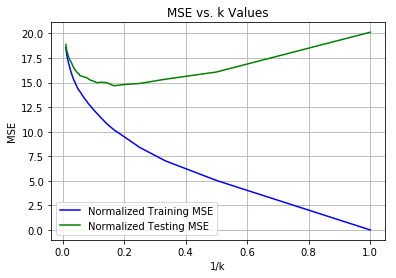

In [43]:
#For normalized features
norm_train_errors=list()
norm_test_errors=list()

for i in k_vals:
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(train_norm, train_label2)
    
    train_pred=knr.predict(train_norm)
    train_err=metrics.mean_squared_error(train_label2, train_pred)
    norm_train_errors.append(train_err)
        
    test_pred=knr.predict(test_norm)
    test_err=metrics.mean_squared_error(test_label2, test_pred)
    norm_test_errors.append(test_err)
    
#Locate the k value with the lowest test error rate and train error rate
a=np.array(norm_test_errors)
find_index=np.where(a==a.min())
print('The minimum normalized test MSE is:',min(norm_test_errors))
print('This test MSE is produced by the following k values:')
for j in find_index:
    k_star=k_vals[j]
    print(k_star)

b=np.array(norm_train_errors)
find_index2=np.where(b==b.min())
print('The minimum normalized train MSE is:',min(norm_train_errors))
print('This train MSE is produced by the following k values:')
for q in find_index2:
    k_star2=k_vals[q]
    print(k_star2)

#Plot
fig, ax = plt.subplots()
ax.plot(1/k_vals, norm_train_errors, 'b-', label='Normalized Training MSE')
ax.plot(1/k_vals, norm_test_errors, 'g-', label='Normalized Testing MSE')
leg = ax.legend()
ax.set_xlabel('1/k')
ax.set_title('MSE vs. k Values')
ax.set_ylabel('MSE')
ax.grid(True)

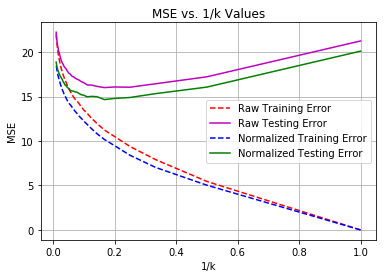

In [44]:
#Combined Plot
fig, ax = plt.subplots()
ax.plot(1/k_vals, raw_train_errors, 'r--', label='Raw Training Error')
ax.plot(1/k_vals, raw_test_errors, 'm-', label='Raw Testing Error')
ax.plot(1/k_vals, norm_train_errors, 'b--', label='Normalized Training Error')
ax.plot(1/k_vals, norm_test_errors, 'g-', label='Normalized Testing Error')
leg = ax.legend()
ax.set_xlabel('1/k')
ax.set_title('MSE vs. 1/k Values')
ax.set_ylabel('MSE')
ax.grid(True)

### (j) Compare the results of KNN REgression with the linear regression model that has the smallest test error and provide your anlaysis.

In [45]:
stats={'Simple Linear Model':[TRMSE_model_1,MSE_model_1],'Complex Linear Model':[TRMSE_model_2, MSE_model_2],'Raw KNN Model':[min(raw_train_errors),min(raw_test_errors)],'Normalized KNN Model':[min(norm_train_errors),min(norm_test_errors)]}
stats=pd.DataFrame(stats,index=['Training','Test'])

stats




,Complex Linear Model,Normalized KNN Model,Raw KNN Model,Simple Linear Model
Training,18.109949,0.00000,0.000000,20.663293
Test,18.244339,14.67208,16.019987,21.037409


#### Answer:<br>
#### Both KNN Regression models produced smaller MSEs than the two linear models. For the linear models, the simple model produced a larger MSE than the model containing interaction and non-linear associations. For the KNN Regression models, the model with normalized features produced a lower test MSE than the model with raw features. Above is a table of the training and test errors for all 4 models we just discussed. You can see that the normalized KNN regression model performed the best, followed by the raw KNN regression model, followed by the complex linear model, and lastly followed by the simple linear model. 

## Question 2 - ISLR: 2.4.1<br>
### 1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

### (a) The sample size n is extremely large, and the number of predictors p is small.

We would expect a flexible statistical learning method to perform better in this case. Because there is a large amount of data, the flexible model will be able to fit the data, and even with small changes in the training data it is unlikely that f^ will change drastically. 

### (b) The number of predictors p is extremely large, and the number of observations n is small.

We would expect a flexible statistical learning method to perform worse in this case. A flexible method would likely overfit the small number of observations, and thus the variance of a flexible model would be very high. If there were a small change in the training set, it is possible there would be a large change in f^ under a flexible model. 

### (C) The relationship between the predictors and response is highly non-linear.

We would expect a flexible statistical learning method to perform better in this case. Trying to fit an inflexible model to data with a highly non-linear relationship would result in large bias, because we would be trying to approximate a real life/complex problem with a much simpler model. This issue would not be the case for flexible models. 

### (d) The variance of the error terms, i.e. Var(epsilon) is extremely high.

We would expect a flexible statistical learning method to perform worse in this case. A flexible method could overfit the noise of epsilon and as a result, the variance would be large - a small change in the training data would result in large changes in f^. 

## Question 3 - ISLR: 2.4.7<br>
### 7. The table provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1=X2=X3=0 using K-nearest neighbors.

### (a) Compute the Euclidean distance between each observation and the test point, X1=X2=X3=0

In [46]:
colors={'Obs':[1,2,3,4,5,6],'X1':[0,2,0,0,-1,1],'X2':[3,0,1,1,0,1],'X3':[0,0,3,2,1,1],'Y':['Red','Red','Red','Green','Green','Red']}
colors_df=pd.DataFrame(colors)
colors_df

,Obs,X1,X2,X3,Y
0,1,0,3,0,Red
1,2,2,0,0,Red
2,3,0,1,3,Red
3,4,0,1,2,Green
4,5,-1,0,1,Green
5,6,1,1,1,Red


In [47]:
def euc_dist(a,b):
    x=((a[0]-b[0])**2)+((a[1]-b[1])**2)+((a[2]-b[2])**2)
    x=x**0.5
    return x

In [48]:
test_point=(0,0,0)
obs1=euc_dist(test_point,(0,3,0))
obs2=euc_dist(test_point,(2,0,0))
obs3=euc_dist(test_point,(0,1,3))
obs4=euc_dist(test_point,(0,1,2))
obs5=euc_dist(test_point,(-1,0,1))
obs6=euc_dist(test_point,(1,1,1))
print('The distance between the test point and Observation 1 is:', obs1)
print('The distance between the test point and Observation 2 is:', obs2)
print('The distance between the test point and Observation 3 is:', obs3)
print('The distance between the test point and Observation 4 is:', obs4)
print('The distance between the test point and Observation 5 is:', obs5)
print('The distance between the test point and Observation 6 is:', obs6)

The distance between the test point and Observation 1 is: 3.0
The distance between the test point and Observation 2 is: 2.0
The distance between the test point and Observation 3 is: 3.1622776601683795
The distance between the test point and Observation 4 is: 2.23606797749979
The distance between the test point and Observation 5 is: 1.4142135623730951
The distance between the test point and Observation 6 is: 1.7320508075688772


### (b) What is our prediction with K=1? Why?

Our prediction with K=1 is Green. Since we are using 1 nearest neighbor, we look at the Y value for the nearest neighbor. Observation 5 is the nearest neighbor because it has the shortest euclidean distance to our test point. Since the Y value for Observation 5 is Green, then our prediction is Green.

### (c) What is our prediction with K=3? Why?

Our prediction with K=3 is Red. Since we are using 3 nearest neighbors, we look at the most common Y value among the 3 nearest neighbors. Observations 5, 6, and 2 are the nearest observations to our test point because they have the 3 shortest euclidean distances to that point. Observation 5 has a Y value of Green, while Observations 6 and 2 have Y values of Red. Because more of the observations are Red, then our prediction is Red.

### (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best vlaue for K to be large or small? Why?

We would expect the best K value to be small. As mentioned earlier in the chapter, smaller K values result in more highly flexible decision boundaries. As K grows, the method becomes less flexible and produces a decision boundary that is close to linear. If the Bayes decision boundary in this problem is highly nonlinear, then we would want a more highly flexible decision boundary and thus a smaller value for K.